In [11]:
import math
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

Задаем формулы для нахождения оценок параметров

In [12]:
def estimate_uniform_k(k, n, X):
    return ((k+1)/n * (X**k).sum())**(1/k)

def estimate_exponential_k(k, n, X):
    return (math.factorial(k)/((X**k).sum()*1/n))**(1/k)

Выборка и параметры

In [13]:
n = 500
k = 100
theta = np.round(rnd.random()*10, 2)
lam = np.round(rnd.random()*10, 2)

num_iter = 40

Отклонение оценки от параметра и оценка СКО

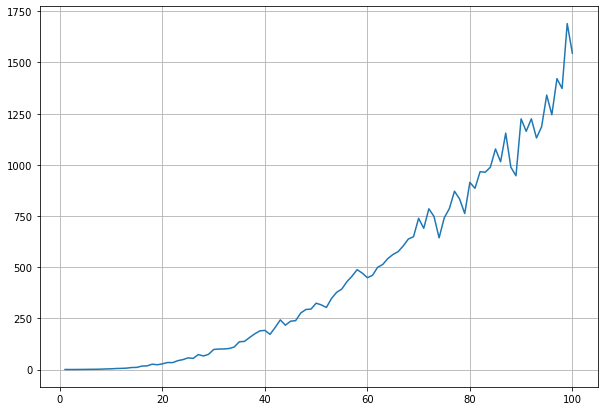

In [14]:
iters_global = []

for est in range(1,k+1):
    iters = np.array([])
    for i in range(num_iter):
        sample_exp = np.array([np.random.exponential(1/lam) for i in range(n)])
        estimate = estimate_exponential_k(est, n, sample_exp)
        iters = np.append(iters,[(estimate - lam)**2]) # MSE loss
        
    iters_global.append(iters.mean())
    
plt.figure(figsize=(10,7))
plt.grid(True)
plt.plot(list(range(1,k+1)), iters_global)

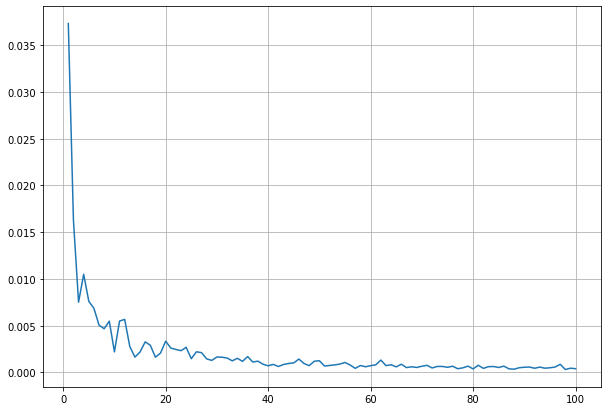

In [15]:
iters_global = []

for est in range(1,k+1):
    iters = np.array([])
    for i in range(num_iter):
        sample = np.array([rnd.random()*theta for i in range(n)])
        estimate = estimate_uniform_k(est, n, sample)
        iters = np.append(iters,[(estimate - theta)**2]) # MSE loss
    iters_global.append(iters.mean())
    
plt.figure(figsize=(10,7))
plt.grid(True)
plt.plot(list(range(1,k+1)), iters_global)

## Выводы:

С ростом К качество оценки улучшается для равномерного распределения и ухудшается для экспоненциального.